## Import Python Modules

First import the modules being used for this project:


In [1]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(profiles.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [4]:
print(profiles.height)

0        75.0
1        70.0
2        68.0
3        71.0
4        66.0
         ... 
59941    62.0
59942    72.0
59943    71.0
59944    73.0
59945    68.0
Name: height, Length: 59946, dtype: float64


In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

## Explore the Data

First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [6]:
print("Number of categories:",profiles.sign.nunique())
print("Categories:", profiles.sign.unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

#### Clean labels

It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [7]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("Number of categories:",profiles.signsCleaned.nunique())
print("Categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

Number of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

## Continous Variables

#### Age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

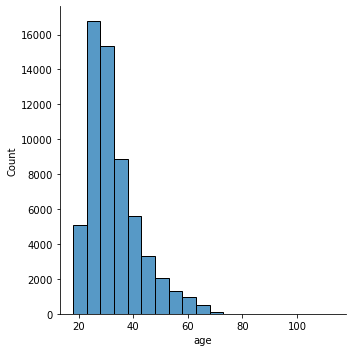

In [8]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

Here is the same chart but broken down by gender. The graphical distribution seems to remain equal, however breaking it down of gender by age it shows slightly fewer females users overall. 

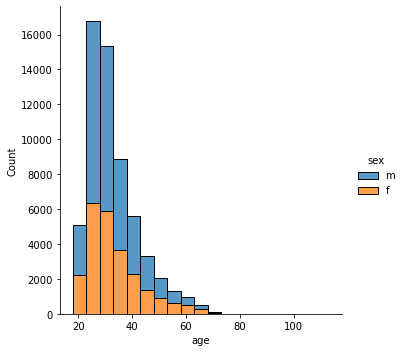

In [9]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

#### Height

The next plot shows the height variable, most people look like they are between 65 and 70 inches. The overall mean is 68 inches (1.72 meters)

In [10]:
profiles.height.mean()

68.29528051649066

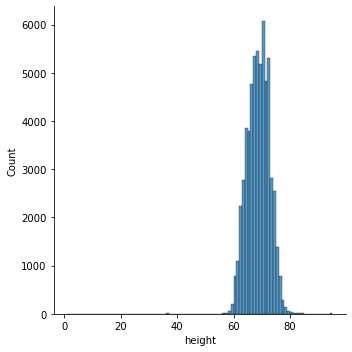

In [11]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 1);

Below is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to follow the same normal distribution. 

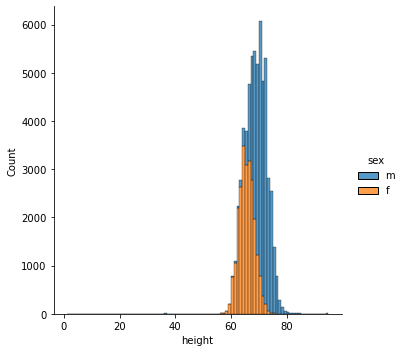

In [12]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 1, multiple = "stack");

#### Income

Here is the data of income, it seems that the majority of the participants do not include their income figures.

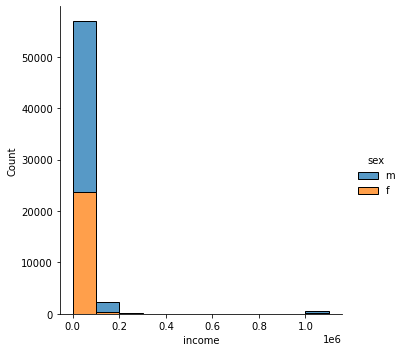

In [13]:
sns.displot(data=profiles, x="income", hue="sex", kind="hist", binwidth= 100000, multiple= "stack");


In [14]:
profiles.income.mean()

20033.222533613585

### Discrete Variables


#### Sex

Previously it was identified that there were more males in the data, and it seems that there are ~35,000 men to ~25,000 women. A 1.4 times more males female  relation

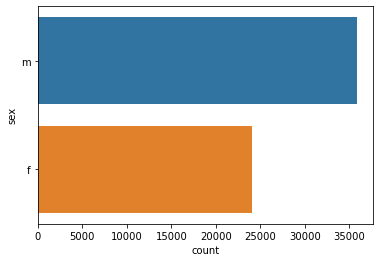

In [15]:
sns.countplot(data=profiles, y="sex");

#### Body Type

 According to the data only a small amount of users prefered not to communicate their body type and many opted to show themselves as average or fit

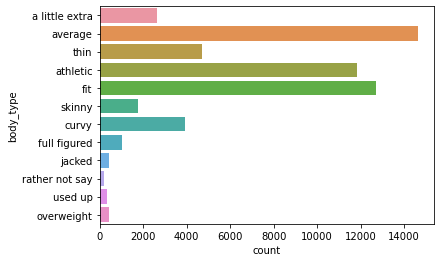

In [16]:
sns.countplot(data=profiles, y="body_type");

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

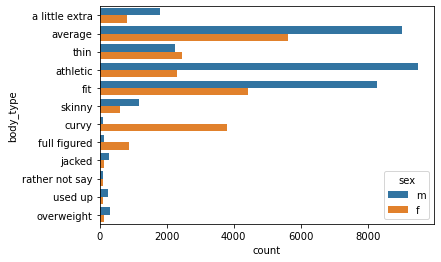

In [17]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

We can see that some descriptions are used more by females like "curvy" or "full figured". In the case of men "athletic" "average" and "little extra" are the ones more used

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", not following an stric diet pattern seems to be the standard for the users of this dating app

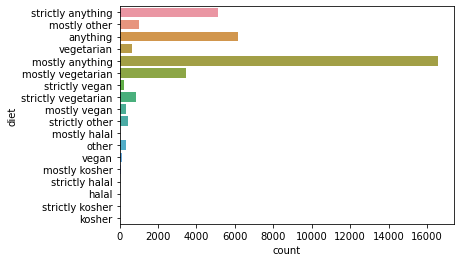

In [18]:
sns.countplot(data=profiles, y="diet");

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

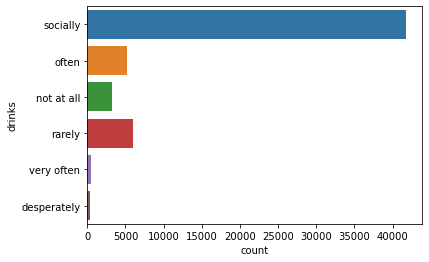

In [19]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

The vast majority of users "never" use drugs. 

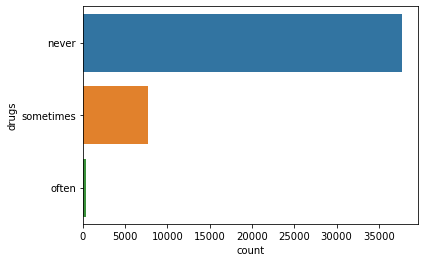

In [20]:
sns.countplot(data=profiles, y="drugs");

Education

Below you can see the majority of users have some university background, being  mostly of the users university graduates. 

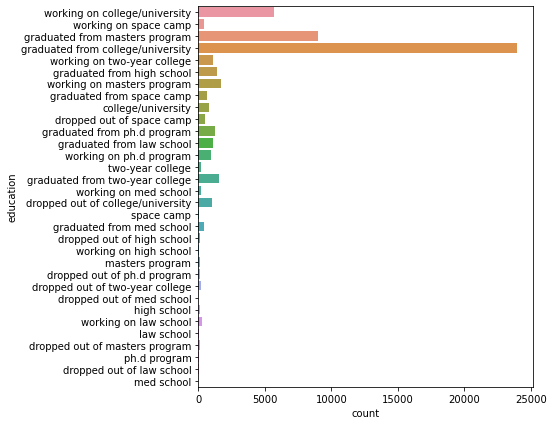

In [21]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

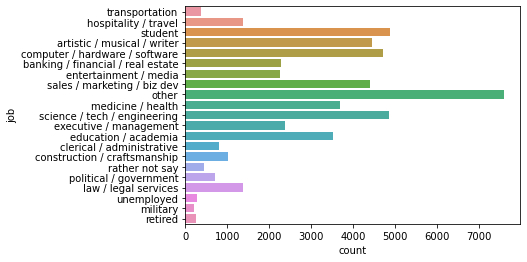

In [22]:
sns.countplot(data=profiles, y="job");

#### Offspring

The data suggest that most users do not have kids. 

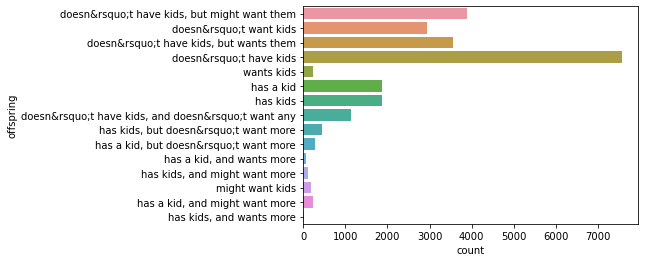

In [23]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

The majority of users are straight.

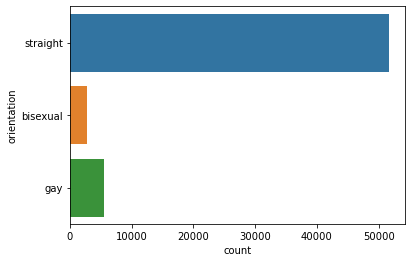

In [25]:
sns.countplot(data=profiles, y="orientation");

## Religion

Many users shared their religious view, agnosticism seems to be a pretty strong religious view

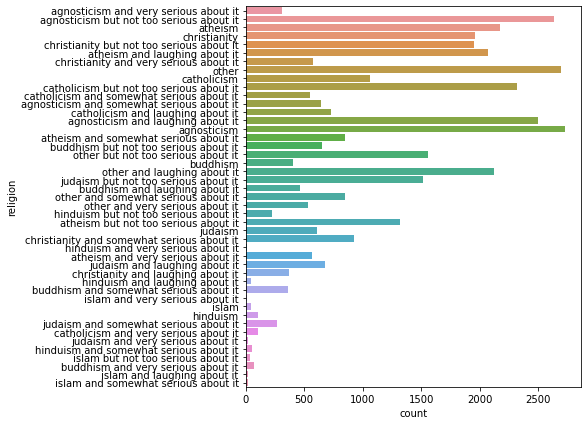

In [26]:
# set figure size
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

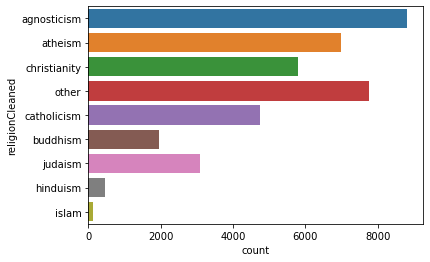

In [27]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

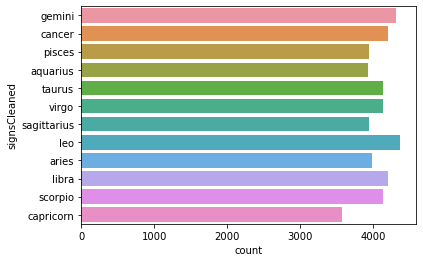

In [28]:
sns.countplot(data=profiles, y="signsCleaned");

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

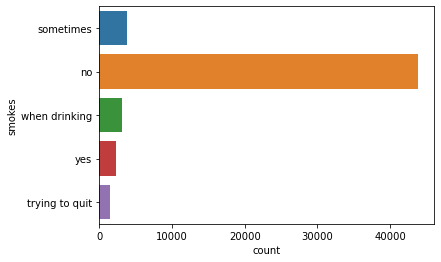

In [29]:
sns.countplot(data=profiles, y="smokes");

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

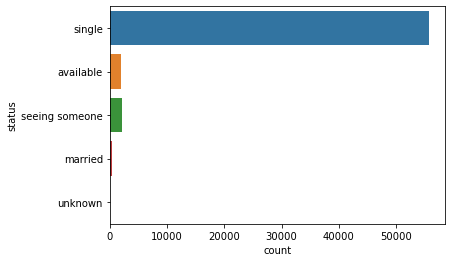

In [30]:
sns.countplot(data=profiles, y="status");

### Data Preparation


### Missing Data
Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values.

In [32]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Preprocessing 



Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for astrological signs, where some of the variables that were not selected such as `age` is probably not a good indicator. 

Here na values are dropped to create a fully complete data set. 

In [33]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

In [34]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [35]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Label Imbalance 

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [36]:
df.signsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

**Splitting Data** 
<br>Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model.